# Project: CT scan artifcat classification

## Step 1: Import packages 

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
#pip install tensorflow 

In [4]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# cv2 : image and video processing library

In [5]:
pip install opencv-python

In [6]:
import cv2

## Step 2: Create the dataset

In [7]:
# Define the path to image forders

artifact_directory = 'C:\\Users\\MIEuser\\Desktop\\CT_artifacts\\Artifacts'
no_artifact_directory = 'C:\\Users\\MIEuser\\Desktop\\CT_artifacts\\No_Artifacts'
total_path = 'C:\\Users\\MIEuser\\Desktop\\CT_artifacts\\Total'

In [8]:
# Create list of all file names of images with artifacts and count them

artifacts_images = []
for i in os.listdir(artifact_directory):
    artifacts_images.append(i)
print("Number of images with artifcats:",len(artifacts_images))

Number of images with artifcats: 5000


In [9]:
# Create list of all file names of images without artifacts and count them

no_artifacts_images = []
for i in os.listdir(no_artifact_directory):
    no_artifacts_images.append(i)
print("Number of images without artifcats:",len(no_artifacts_images))

Number of images without artifcats: 5000


In [10]:
# Example file names:

print(no_artifacts_images[0])
print(artifacts_images[0])

CT_Image_n1.png
CT_Image_a1.png


In [11]:
# Create a list of all image names and shuffle them

all_images = artifacts_images + no_artifacts_images
random.shuffle(all_images)
print("Number of total images:",len(all_images))

Number of total images: 10000


In [12]:
# Define a function to read and resize the images 


def process_resize_image(list_of_images):
    '''
    retruns two arrays:
    X is an array of images
    Y is an array of labels 

    '''
    X = [] #images
    Y = [] #labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(os.path.join(total_path,image),cv2.IMREAD_GRAYSCALE),(128,128), interpolation = cv2.INTER_AREA))
        
        if "_n" in image:
            Y.append(0)
        elif "_a" in image:
            Y.append(1)
            
    return (X,Y)



In [13]:
# Apply the "process_resize_image" function to all image names to read and resize all images

resized_images, resized_labels = process_resize_image(all_images)

label: 1


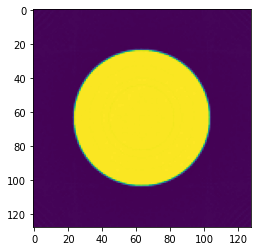

In [14]:
# Example image (with artifact if label is 1, without artifact if label is 0)

plt.imshow(resized_images[0])
print("label:",resized_labels[0])

label: 0


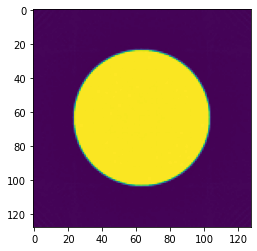

In [15]:
# Example image (with artifact if label is 1, without artifact if label is 0)

plt.imshow(resized_images[1])
print("label:",resized_labels[1])

In [19]:
# Split the data into train and test subsets

x_train, x_test, y_train, y_test = train_test_split (resized_images, resized_labels, test_size = 0.25, random_state = 42)

In [20]:
# Check the lenth of the train and test subsets

ltr = len(y_train)
print("ltr: ",ltr)
lt = len(y_test)
print("lt: ",lt)

ltr:  7500
lt:  2500


In [21]:
# Double-check the unique values of labels for the train and test subsets

uniq_test_labels = np.unique(y_test)
print("test labels: ",uniq_test_labels)
uniq_training_labels = np.unique(y_train)
print("training labels:", uniq_training_labels)

test labels:  [0 1]
training labels: [0 1]


In [28]:
# Convert the subsets to numpy arrays

x_train = np.array(x_train)
print('training images np array shape:',x_train.shape)

y_train = np.array(y_train)
y_train.shape = (7500,1)
print('training labels np array shape:',y_train.shape)

x_test = np.array(x_test)
print('testing images np array shape:',x_test.shape)

y_test = np.array(y_test)
y_test.shape = (2500,1)
print('testing labels np array shape:',y_test.shape)


training images np array shape: (7500, 128, 128)
training labels np array shape: (7500, 1)
testing images np array shape: (2500, 128, 128)
testing labels np array shape: (2500, 1)


In [31]:
# Normalize the train and test image subsets

min_train = np.min(x_train)
print("min pixel value, train: ",min_train)
max_train = np.max(x_train)
print("max pixel value, train: ",max_train)
min_test = np.min(x_test)
print("min pixel value, test: ",min_test)
max_test = np.max(x_test)
print("max pixel value, test: ",max_test)

x_train_normalized = x_train/max_train
x_test_normalized = x_test/max_test

min pixel value, train:  0
max pixel value, train:  255
min pixel value, test:  0
max pixel value, test:  255


[0]


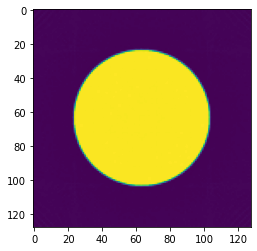

In [32]:
# Example image after nomalization (with artifact if label is 1, without artifact if label is 0)

plt.imshow(x_test_normalized[0])
print(y_test[0])

[1]


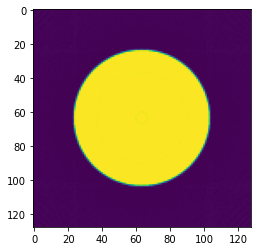

In [34]:
# Example image after nomalization (with artifact if label is 1, without artifact if label is 0)

plt.imshow(x_test_normalized[1])
print(y_test[1])

## Convolutional Neural Networks Model

In [36]:
#CNN Model set to stop training after reaching 99% accuray 

class Mycallback2 (tf.keras.callbacks.Callback):
    def on_epoch_end (self,epoch, logs = {}):
        if logs.get("acc") > 0.99:
            print("\n accuracy is greater than 0.99 now \n")
            self.model.stop_training = True

training_images_c = x_train_normalized.reshape(7500,128,128,1)
test_images_c = x_test_normalized.reshape(2500,128,128,1)

callbacks = Mycallback2()
model_ct = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = tf.nn.relu,input_shape = (128,128,1)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation = tf.nn.relu),
                           tf.keras.layers.Dense(1, activation = 'sigmoid')])

model_ct.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001),loss = "binary_crossentropy", metrics = ["acc"])
results = model_ct.fit(training_images_c, y_train, epochs = 15,callbacks = [callbacks])
model_ct.evaluate(test_images_c,y_test)

Epoch 1/15
235/235 [==============================] - 101s 423ms/step - loss: 0.6954 - acc: 0.4898
Epoch 2/15
235/235 [==============================] - 94s 400ms/step - loss: 0.6936 - acc: 0.4916
Epoch 3/15
235/235 [==============================] - 96s 407ms/step - loss: 0.6936 - acc: 0.4906
Epoch 4/15
235/235 [==============================] - 95s 403ms/step - loss: 0.6930 - acc: 0.50290s - loss: 0.6930 - acc: 0.502
Epoch 5/15
235/235 [==============================] - 95s 404ms/step - loss: 0.6928 - acc: 0.5102
Epoch 6/15
235/235 [==============================] - 96s 407ms/step - loss: 0.6909 - acc: 0.5505
Epoch 7/15
235/235 [==============================] - 99s 421ms/step - loss: 0.6865 - acc: 0.6025
Epoch 8/15
235/235 [==============================] - 117s 499ms/step - loss: 0.6718 - acc: 0.6629
Epoch 9/15
235/235 [==============================] - 123s 523ms/step - loss: 0.6306 - acc: 0.8378
Epoch 10/15
235/235 [==============================] - 125s 531ms/step - loss: 0.5338

[0.2000531107187271, 1.0]

In [37]:
print(results.history.keys())

dict_keys(['loss', 'acc'])


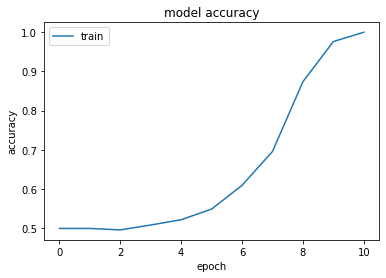

In [38]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

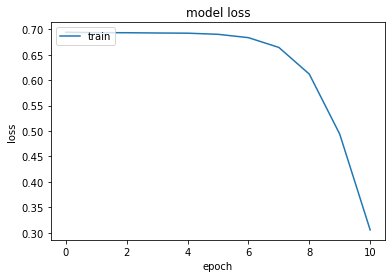

In [39]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
prediction = model_ct.predict(test_images_c)

In [42]:
for i in range(5):
    print(i)
    print(prediction[i])
    print(y_test[i])
    print("_"*30)

0
[0.18944734]
[0]
______________________________
1
[0.8607552]
[1]
______________________________
2
[0.18944734]
[0]
______________________________
3
[0.18944734]
[0]
______________________________
4
[0.8159616]
[1]
______________________________
